# Hands-on 06: Transição analógico/digital (amostragem, reconstrução ideal, quantização, codificação PCM e multiplexação TDM) 


# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre o processo de digitalização de um sinal contínuo (amostragem, quantização, codificação, reconstrução);
- Fazer uma breve revisão sobre multiplexação TDM;
- Ilustrar o processo de filtragem no domínio do tempo e da frequência;
- Praticar os conceitos com protótipos em Matlab e Python.

# _Pulse Code Modulation_ (PCM) 

Uma forma prática de exemplificar a digitalização de um sinal contínuo é entender as operações relacionadas com o _Pulse Code Modulation_ (PCM). O PCM é uma técnica de codificação por forma de onda (modulação em banda-base) que transforma um sinal contínuo (caracterizados por sua amplitude poder assumir qualquer valor num intervalo de tempo contínuo) em um onda digital (sequências de zeros e uns representados por uma forma de onda discreta em amplitude e contínua no tempo, um trem de pulsos). Para a obtenção da onda PCM, o sinal contínuo passa por algumas etapas de processamento, entre elas:
- **Filtragem passa-baixa:** O grande objetivo aqui é limitar a largura de banda do sinal em banda-base para evitar problemas de sobreposição espectral nas demais etapas do processo;
- **Amostragem:** Sua função é transformar o sinal de tempo contínuo em sinal discreto no tempo;
- **Quantização:** Sua razão de ser é transformar o sinal amostrado e analógico em um sinal discreto também em amplitude, ao atribuir níveis finitos de amplitude que o sinal poderá assumir. Ao final dessa etapa obtém-se um sinal com um número finito de amostras (discretas no tempo pela amostragem) e com cada amostra sendo representada por um nível discreto de amplitude (quantizadas). Assim, por meio da amostragem e quantização, o sinal que era contínuo em tempo e amplitude (uma função com domínio e imagem pertencentes ao $\mathbb{R}$) passa a ser representado por uma função com domínio e imagem pertencentes ao $\mathbb{N}$;
- **Codificador:** Aqui ocorre a transformação de uma onda como sinal elétrico em uma onda digital (sequência de zeros e uns). Uma maneira clássica de realizar essa etapa é representar cada nível de amplitude quantizada em uma sequência de bits (muitas vezes de maneira igualitária). Para tal, vale a relação:
$$n = log_2(L) \Leftrightarrow  L = 2^n,$$
sendo $L$ o número de níveis de amplitude da quantização e $n$ o número de bits que representa cada nível;
- **Modulação em banda-base ou codificação de linha**: De posse da sequência de zeros e uns que representa o sinal contínuo, o codificação de linha atribui uma forma de pulso a cada bit (ou a um conjunto de bits, no caso de modulação multinível), resultando em um sinal discreto em amplitude (existe um conjunto finito de formas de pulsos) e contínuo no tempo. O exemplo mais direto da codificação de linha é usar um pulso quadrado de amplitude _A_ para representar o bit 1 e um pulso quadrado de amplitude -_A_ para representar o bit 0. 

 Em muitas amplicações, só se necessita dos bits PCM (amostragem, quantização e codificação), principalmente se o alvo é o processamento e/ou o armezenamento dos bits que representam a informação. 

A digitalização promove algumas vantagens em relação à comunicação analógica:
- Um sinal digital é capaz de ser transmitido em um meio de comunicação com maior nível de ruído e distorções do que um sinal analógico (dentro de certos limites), aumentando sua confiabilidade da transmissão. Ou seja, um sinal quantizado por mais que o ruído perturbe a natureza da onda, seus valores de amplitudes (e sua forma) são pré-definidos, sendo possível recuperar o sinal original por meio de regeneração do pulso. Na comunicação analógica, isso é dificultado, pois a forma da onda precisaria ser regenerada (e claro, ela não é conhecida na transmissão analógica). Isso possibilita o uso de regeneradores do sinal digital em uma comunicação ponto-a-ponto com um controle bem fino da taxa de erro, garantindo **confiabilidade**;
- Maior facilidade na multiplexação de sinais, resultando em maior **eficiência**;
- Maior facilidade no armazenamento em relação aos sinais analógicos, tanto por razões físicas quanto por facilidade de usar codificadores de fonte (compressores e compactadores). A codificação de fonte também é responsável por um grande aumento de **eficiência** na transmissão da informação;
- Maior facilidade de implementar estratégias de **segurança** da informação;
- Maior facilidade de manipular (armezenar e transmitir) informação com alta qualidade (e.g. imagem e vídeo em alta definição, áudio com alta fidelidade, grande quantidade de dados com baixo erro).

# Prática 1: Amostragem (visualização no tempo e na frequência)

A primeira etapa da modulação PCM é a amostragem, um processo completamente reversível, i.e., que pode ser desfeito sem perdas. Isso significa que o conjunto de amostras pode ser usado para reconstruir completamente o sinal contínuo. Para que isso ocorra, o processo de amostragem **deve** obedecer algumas regras. A primeira delas é estabelecida pelo teorema de Nyquist: dado um sinal contínuo $m(t)$ com largura de banda $B$, desde que a frequência de amostragem seja maior que dobro da largura de banda ($f_{s}$ > 2B) é possível recuperar o sinal contínuo perfeitamente a partir do sinal amostrado. Uma segunda regra, mas não menos importante que a primeira, é que o sinal amostrado seja limitado em banda. Essa segunda regra pode ser garantida com um filtro passa-baixa aplicado ao sinal contínuo antes da amostragem.

Como já foi tema de práticas anteriores, essas regras devem ser obedecidas para evitar o _aliasing_ (mascaramento), que nada mais é que a sobreposição das cópias espectrais resultantes do processo de amostragem. Nesta prática, veremos esse efeito em um sinal senoidal.

O código a seguir mostra a maneira genérica de gerar um sinal senoidal no Matlab. Dessa maneira, dependedo do referencial temporal, podemos modelar um sinal contínuo no tempo (taxa amostragem alta). Contudo, isso é somente um modelo, pois, na realidade, todos os sinais em um computador são discretos.

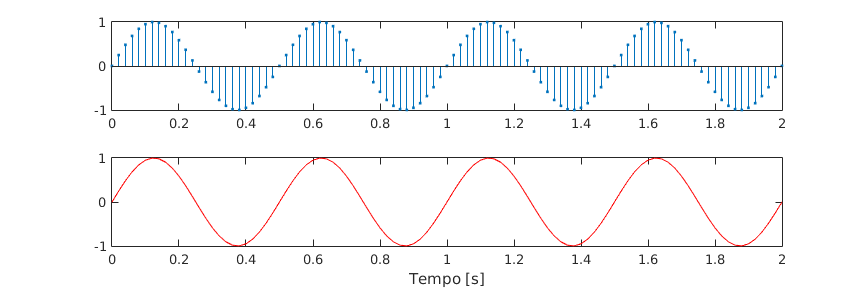

In [14]:
Ts = 0.02;
t = 0:Ts:2;
m = sin(2*pi*2*t);
fig = figure;
subplot(2,1,1);
stem(t,m,'.');
subplot(2,1,2);
plot(t,m,'r');
xlabel('Tempo [s]');

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];

Note que o sinal (vetor _m_) construído acima não é contínuo no tempo, mas discreto. Contudo, depedendo da maneira que o sinal é mostrado (função **stem** ou função **plot**), sua visualização no domínio do tempo é diferente.  Isso ocorre porque a função **plot** liga os pontos do vetor por meio de retas, dando a visualização de um sinal contínuo. Contudo, a amostra em $t$ = 0.01, simplesmente, não existe, pois o eixo temporal foi construído em passos de 0.02. Outra faceta dessa representação é que existe uma diferença clara no tratamento do sinal quando as amostras faltantes não existem ou quando são iguais a zero. Vamos mostrar esse comportamento logo a seguir.

Uma novidade desse código é a formatação do tamanho da figura. O seguinte trecho de código faz esse trabalho:
>```python
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];
```

Como já praticado em outros experimentos, para escrever esse código no Python precisamos das bibliotecas **Numpy** e **Matplotlib**.

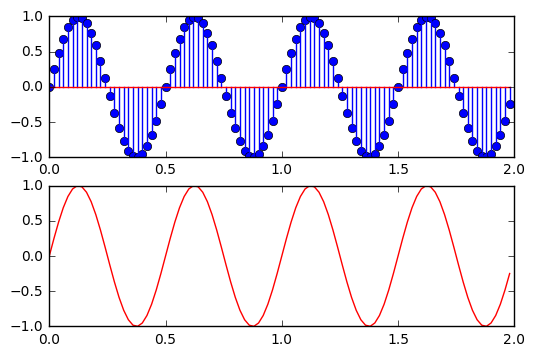

In [6]:
import numpy as np
from matplotlib import pyplot as plt
Ts = 0.02
t = np.arange(0,2,Ts)
x = np.sin(t*2*np.pi*2)
plt.subplot(211)
plt.stem(t,x)
plt.subplot(212)
plt.plot(t,x,'r')
plt.show()

## Subamostragem e Sobreamostragem

Duas operações bem importantes relacionadas a amostragem são a subamostragem e sobre amostragem. Sem se deter ao processo matemático envolvido nessas duas operações, iremos exemplificar como elas funcionam. 

Um uso comum da subamostragem e da sobreamostragem é a adequação no ritmo das amostras (taxa de amostragem) em um cadeia de processamento digital de sinais que envolva hardwares diferentes. Podemos ter situações que hardwares com diferentes capacidades de processamento tenham que, ao trabalharem em conjunto no mesmo sinal, realizar mudanças de taxa de amostragem para adequar o envio/recebimento de amostras no ritmo que eles consigam trabalhar. Um exemplo cotidiano é o uso da placa de som do nosso computador. Geralmente elas trabalharam com taxa de amostragem de 44,1 kHz, e precisam que os softwares que a usam mandem amostras nesse ritmo. Caso isso não seja feito, ouviremos um som acelerado ou lento.

Outro exemplo é a recepção em um sistema sem fio. O sinal é recebido em alta frequência (necessitando uma alta taxa de amostragem), mas quando demodulado, o sinal em banda-base sofrerá um _downsample_ para que todo o processamento digital de sinais (e.g. codificação de canal) seja feito com menor taxa de amostragem. Isso exige processar menos amostras, resultando em menos consumo computacional e economia de energia.

A função **downsample** do Matlab coleta amostras em um intervalo de _N_ elementos, especificado como parâmetro.

In [1]:
N = 10;
x=0:1:100;                                          % Vetor com número inteiros de 0 à 100, de 1 em 1
y= downsample(x,N);                                 % Coleta 1 elemento a cada 10 elementos do vetor
disp(y);

     0    10    20    30    40    50    60    70    80    90   100



Na biblioteca **Numpy** do Python, existe a função **resample**, que retorna um resultado semelhante ao necessário, mas os parâmetros não são tão intuitivos como o do Matlab. Por isso, usaremos a própria sintaxe do Python para indexar o vetor e obter os valores que queremos:

In [2]:
import numpy as np
x = np.linspace(0,100,101)
N = 10
y = x[::N]
print(y)

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


Similarmente, a função **upsample** do Matlab aumenta o vetor preenchendo com zeros (_N - 1_) elementos entre as amostras do vetor de entrada.

In [4]:
x=1:1:10;                                            
N = 3;
y = upsample(x,N);                                         
disp(y);

  Columns 1 through 13

     1     0     0     2     0     0     3     0     0     4     0     0     5

  Columns 14 through 26

     0     0     6     0     0     7     0     0     8     0     0     9     0

  Columns 27 through 30

     0    10     0     0



Já no Python, podemos definir duas funções com os propósitos acima. Tradicionalmente, isso é uma maneira de otimizar o código, melhorando seu aspecto e usabilidade.

In [10]:
import numpy as np

# Criação das funções, por questão de organização
def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret

xu = np.linspace(1,10,10)
xd = np.linspace(0,100,101)
Nd = 10
Nu = 3
yu = upsample(xu,Nu);
yd = downsample(xd,Nd);
print("Upsample:")
print(yu)
print("Donwsample:")
print(yd)

Upsample:
[  1.   0.   0.   2.   0.   0.   3.   0.   0.   4.   0.   0.   5.   0.   0.
   6.   0.   0.   7.   0.   0.   8.   0.   0.   9.   0.   0.  10.   0.   0.]
Donwsample:
[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


**Passo 01:** Abra um script no Matlab, salve-o como **handson6_1.m** e escreva o seguinte código:

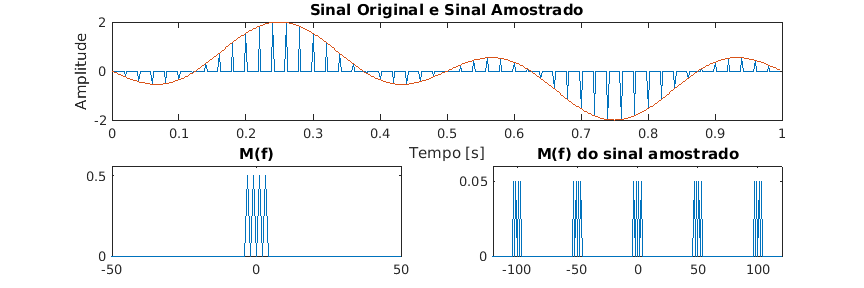

In [1]:
close all; clear all; clc;
%% Parâmetros
T=0.002;                                                % Taxa de amostragem (500kHz)
Tf=1;                                                   % Tempo final em segundos
t=0:T:Tf-T;                                             % Definição do eixo do tempo      
fm1=3;                                                  % Frequência senoide 1      
fm2=1;                                                  % Frequência senoide 2
m_t=sin(2*pi*fm2*t)-sin(2*pi*fm1*t);                    % Sinal mensagem m(t)
ts=0.02;                                                % Nova taxa de amostragem (para cima e para baixo)
N_samp=round(ts/T);                                     % Número de elementos 
% T/ts deve ser, preferencialmente, inteiro.

%% Amostragem 
s_out=downsample(m_t,N_samp);                           % Coleta 1 amostra a cada N_samp amostras do sinal  
s_out=upsample(s_out,N_samp);                           % Retorna vetor amostrado com o número inicial de elementos

%% Espectro do sinal de entrada
lfft=length(m_t);                                       % Comprimento da fft
M_f=fftshift(fft(m_t,lfft)/lfft);                       % Sinal m_t na frequência 
S_out=fftshift(fft(s_out,lfft)/lfft);                   % Sinal s_out na frequência
Fs=1/T;
freq=-Fs/2:Fs/lfft:Fs/2-Fs/lfft;

%% Salva todas as variáveis da área de trabalho (caso necessário, descomentar as linhas abaixo)
filename = 'Amostragem.mat';
save(filename);

%% Plotting
% Plot do sinal no tempo
fig = figure;
subplot(2,2,[1 2]);
plot(t,s_out);
hold on;
plot(t,m_t);
title('Sinal Original e Sinal Amostrado');
xlabel('Tempo [s]');
ylabel('Amplitude');

% Plot do sinal na frequência
subplot(2,2,3);
plot(freq,abs(M_f));
title('M(f)');
axis([-50 50 0 0.56]);
subplot(2,2,4);
plot(freq,abs(S_out));
title('M(f) do sinal amostrado');
axis([-120 120 0 0.06]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 3];

Para obter os gráficos com Python, além da definição das funções **upsample** e **downsample**, precisamos importar as bibliotecas para o cálculo do espectro do sinal.

**Passo 02:** Abra um script no Python, salve-o como **handson6_1.py** e escreva o seguinte código (não esqueça de mudar o Kernel do Jupyter):

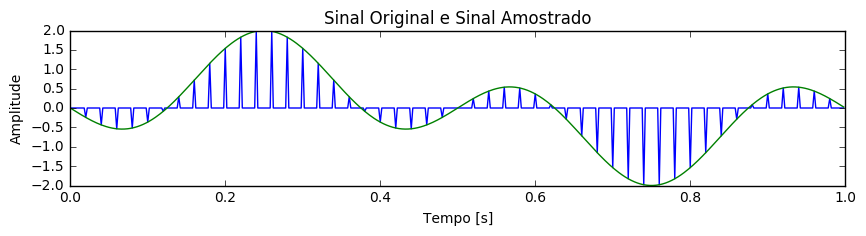

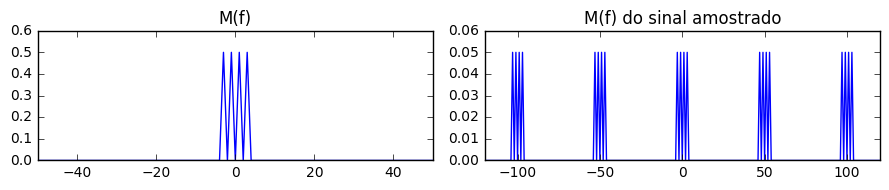

In [17]:
# Parâmetros
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift

# Criação das funções, por questão de organização
def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret

T=0.002                                                 # Taxa de amostragem (500kHz)
Tf=1                                                    # Tempo final em segundos
t= np.arange(0,Tf,T)                                    # Definição do eixo do tempo      
fm1=3                                                   # Frequência senoide 1      
fm2=1                                                   # Frequência senoide 2
m_t=np.sin(2*np.pi*fm2*t)-np.sin(2*np.pi*fm1*t)         # Sinal mensagem m(t)
ts=0.02                                                 # Nova taxa de amostragem
N_samp=round(ts/T)                                      # Número de elementos 
# T/ts deve ser, preferencialmente, inteiro.

## Amostragem 
s_out=downsample(m_t,N_samp)                            # Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out=upsample(s_out,N_samp)                            # Retorna vetor amostrado com o número inicial de elementos

## Espectro
lfft=len(m_t)                                           # Comprimento da fft
M_f=fftshift(fft(m_t,lfft)/lfft)                        # Sinal m_t na frequência 
S_out=fftshift(fft(s_out,lfft)/lfft)                    # Sinal s_out na frequência
Fs=1/T 
freq = np.arange(-Fs/2,Fs/2,Fs/lfft)

#plotting
plt.figure(1,[10,2])
#
plt.plot(t,s_out,t,m_t)
plt.title("Sinal Original e Sinal Amostrado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()
plt.figure(2,[9,2])
#
#
plt.subplot(121)
plt.plot(freq,np.abs(M_f))
plt.xlim([-50,50])
plt.ylim([0,0.6])
plt.title("M(f)")
#
plt.subplot(122)
plt.plot(freq,np.abs(S_out))
plt.title("M(f) do sinal amostrado")
plt.xlim([-120,120])
plt.ylim([0,0.06])
#
plt.tight_layout()
plt.show()

Perceba que o sinal resultante $s_{out}(t)$ é do tipo PAM (_Pulse Amplitude Modulation_) com pulsos extremamente estreitos, expressando um sinal amostrado idealmente. O sinal é amostrado e retorna a zero até a próxima amostra.

Outra observação de suma importância é o efeito da amostragem no espectro do sinal. Vemos que o espectro do sinal amostrado é composto do espectro do sinal original (centrado em zero) e cópias equidistantes de $Fs$ (taxa de amostragem). Isso é especialmente importante para o processo de reconstrução do sinal, o qual é realizado ao se filtrar somente o espectro do sinal original.

Observando os gráficos, um pergunta interessante surge: **Se antes estávamos fazendo amostragem de um sinal qualquer $m(t)$ e não aparecia frequências laterais, então por que surgiu essas frequências???**

Simples! A amostragem antes era feita em um vetor de tempo $t$ em que todo elemento de $t$ tinha uma amostra de $m(t)$. Neste experimento, como queremos simular a amostragem real, nem todo instante de tempo $t$ teria amostras de $m(t)$. De forma mais clara, antes criávamos um modelo de sinal contínuo (em uma máquina discreta, o computador), agora amostramos o sinal e voltamos para zero em todos os outros elementos de $t$ simulando as regiões que não ocorreu a amostragem de verdade.

Temos que tomar cuidado a subamostrar um sinal discreto, pois quando a taxa de amostragem resultante é menor que duas vezes a frequência máxima do sinal, ocorre _aliasing_, tornando o sinal resultante impossível de ser usado para reconstruir o sinal original sem perdas.

Por exemplo, seja $m(t)$ um sinal com frequência de 25 Hz e taxa de amostragem de 500 Hz, quando subamostramos o sinal pulando 10 elementos é como se a frequência de amostragem fosse de 10x menor que a frequência anterior. Isso provoca uma mudança séria no momento da reconstrução do sinal, pois a taxa de amostragem agora é de 50 Hz, causando _aliasing_. 

# Prática 2: Reconstrução ideal do sinal amostrado

Matematicamente, para $n\in\mathbb{N}$ o sinal amostrado idealmente $\tilde{m}(t)$ pode ser escrito como:

$$\tilde{m}(t) = \sum_{n=-\infty}^{\infty}m(nTs)\delta(t-nTs)$$

Seu espectro é:

$$\tilde{M}(f) = \frac{1}{Ts}\sum_{n=-\infty}^{\infty}M(f-nFs)$$

Como mencionado anteriormente, a reconstrução do sinal original é realizada por meio de uma filtragem passa-baixa aplicada ao sinal amostrado, pela qual somente o espectro original de $m(t)$ é mantido. Assim, **o processo ideal de reconstrução na frequência** se baseia em um filtro quadrado $H_R(f)$ com frequência de corte igual ou ligeiramente maior que a banda do sinal original.

Matematicamente, se $\tilde{M}(f)$ é o espectro do sinal amostrado, temos:

$$M(f) = \tilde{M}(f)H_R(f)$$

com $H_R(f) = Ts \cdot rect\left( \frac{f}{2W}\right)$, sendo _W_ a banda do sinal original $m(t)$. A figura abaixo ilustra esse processo.

![fig_recons_freq](../FIGS/HD_06/fig_recons_freq.png)

Já no tempo, sendo $h_R(t)$ a resposta ao impulso do filtro de reconstrução $H_R(f)$, $m(t)$ é reconstruído pela convolução:

$$m(t) = \tilde{m}(t) \ast h_R(t)$$

Com $H_R(f) = \mathcal{F} \left\{ h_R(t) \right\}$, podemos escrever: 

$$h_R(t) = 2BTs \cdot sinc\left( 2\pi B t\right) = sinc(2\pi B t)$$

Assim, o efeito da filtragem no tempo é uma interpolação:

$$m(t) = \sum_{n=-\infty}^{\infty} \tilde{m}(nTs)   sinc[2\pi B (t-nTs) ]$$

No caso da filtragem ideal, a interpolação é feita por funções **sinc**, como ilustra a figura a seguir.

![fig_recons_tempo](../FIGS/HD_06/fig_recons_tempo.png)

Essa interpolação pode ser implementada por meio da convolução $m(f) = \tilde{m}(t) \ast h_R(t)$ ou da implementação explícita do somatório de sincs deslocadas e pesadas pelos valores dos sinais amostrados. Geralmente, a função convolução discreta resulta em um vetor de tamanho igual a soma dos tamanhos dos vetores de entrada, de tal forma que:

$$ w(k)=u(j)*v(j)=\sum_{j}^{} u(j)\cdot v(k-j+1)$$

Com n = length(u) e m = length(v), w é um vetor de comprimento length(w)=m+n-1. Isso precisa ser levado em consideração no momento da implementação da reconstrução do sinal amostrado usando a convolução.

**Passo 01:** Abra um script no Matlab, salve-o como **handson6_2.m** e escreva o seguinte código:

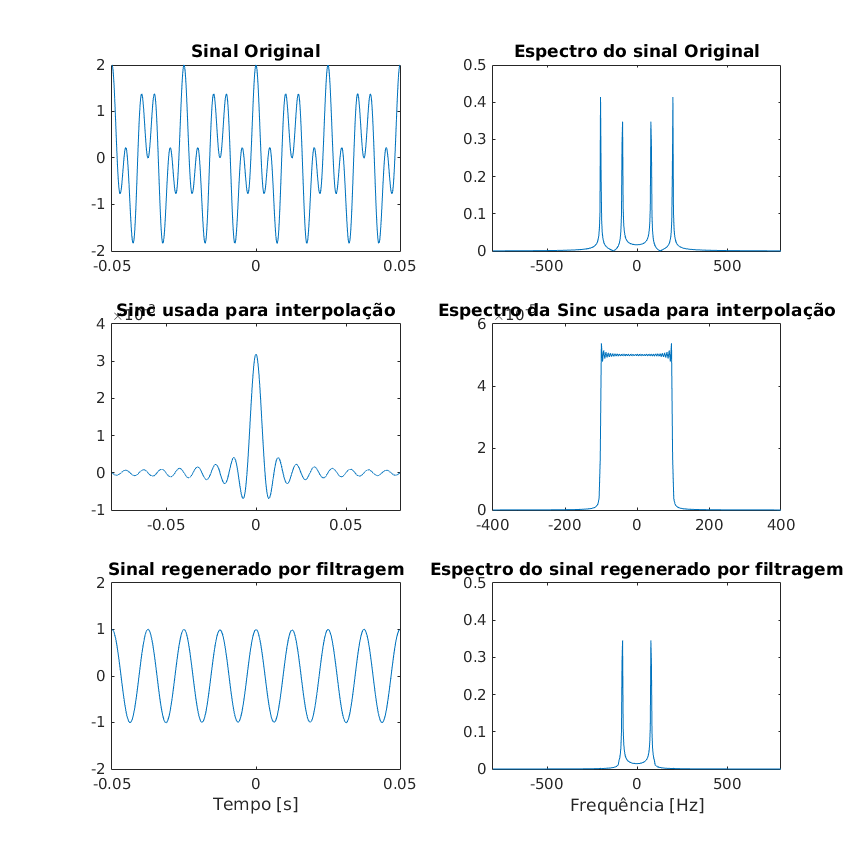

In [10]:
clear all;clc;close all;
%% Parâmetros da Sinc
B=100;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc para reconstrução no tempo
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução e realiza a filtragem no tempo
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Gráficos 
% Plot do Sinal no tempo
fig = figure;
subplot(3,2,1);                                      
plot(t,m);
title('Sinal Original');
axis([-0.05 0.05 -2 2]);
% Plot do Sinal na frequência                   
subplot(3,2,2);
plot(freq,abs(M));        
title('Espectro do sinal Original');
axis([-800 800 0 0.5]);
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3);                                      
plot(t,s);
title('Sinc usada para interpolação');
axis([-0.08 0.08 -1e-3 4e-3]);
% Plot do Sinc na frequência                   
subplot(3,2,4);
plot(freq,abs(S));       
title('Espectro da Sinc usada para interpolação');
axis([-400 400 0 6e-5]);
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5);
plot(t,c);      
title('Sinal regenerado por filtragem');
xlabel('Tempo [s]');
axis([-0.05 0.05 -2 2]);
% Plot da convolução na frequência   
subplot(3,2,6);
plot(freq,abs(C));
title('Espectro do sinal regenerado por filtragem');
xlabel('Frequência [Hz]');
axis([-800 800 0 0.5]);

fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];

Para a versão em Python desse experimento, usaremos a função **convolve** da biblioteca Numpy para realizar a convolução entre o sinal amostrado e a resposta ao impulso do filtro ideal.

**Passo 02:** Abra um script no Python, salve-o como **handson6_2.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

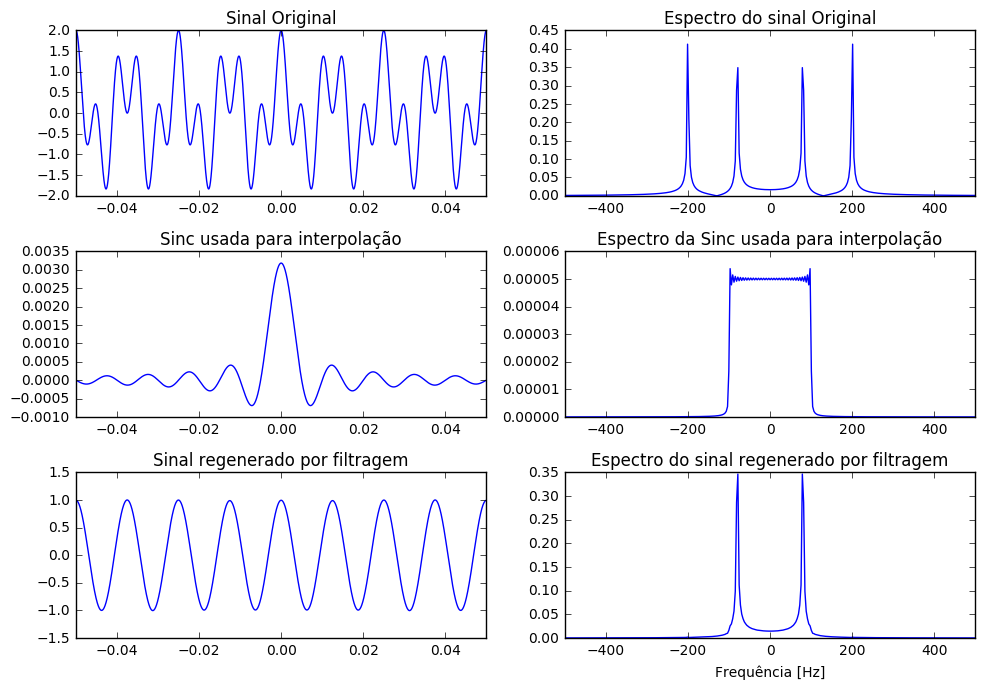

In [2]:
from scipy.fftpack import fft, fftshift
import numpy as np
from matplotlib import pyplot as plt

## Parâmetros da Sinc
B=100                                                      # Banda do filtro
Ts=1/(200*np.pi*B)                                         # Taxa de geração (Passo no tempo)
Fs=1/Ts                                                    # Frequência de amostragem
N=10000                                                    # Número de amostras
tf=N*Ts                                                    # Tempo final
t= np.arange(-tf,tf,Ts)                                    # Eixo do tempo
Am=2*Ts*B                                                  # Amplitude do sinal
s= Am*np.sinc(2*B*t)                                       # Sinc 
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t)               # Sinal m(t)

## Convolução
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
# Espectros
lfft=len(s)                                                # Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft)                               # Sinc S(f)
M=fftshift(fft(m,lfft)/lfft)                               # Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft)                               # Sinal M(f) 
freq = np.arange(-Fs/2,Fs/2-Fs/lfft,Fs/lfft)               # Eixo da frequência
# Gráficos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Sinal Original")
plt.plot(t,m)
plt.xlim([-0.05,0.05])
#
plt.subplot(322)
plt.title("Espectro do sinal Original")
plt.plot(freq,np.abs(M))
plt.xlim([-500,500])
#
plt.subplot(323)
plt.title("Sinc usada para interpolação")
plt.plot(t,s)
plt.xlim([-0.05,0.05])
#
plt.subplot(324)
plt.title("Espectro da Sinc usada para interpolação")
plt.plot(freq,np.abs(S))
plt.xlim([-500,500])
#
plt.subplot(325)
plt.title("Sinal regenerado por filtragem")
plt.plot(t,c)
plt.xlim([-0.05,0.05])
#
plt.subplot(326)
plt.title("Espectro do sinal regenerado por filtragem")
plt.plot(freq,np.abs(C))
plt.xlabel("Frequência [Hz]");
plt.xlim([-500,500])
#
plt.tight_layout(pad=1.1)
plt.show()

### Comentários sobre o código

- Sinal a ser amostrado é composto pela soma de dois sinais senoidais com frequências 200 e 80 Hz (parâmetro de entrada):
```python
m=np.cos(2*np.pi*200*t)+np.cos(2*np.pi*80*t) 
```
 
- O sinal Sinc (resposta ao impulso do filtro ideal) foi construído com a banda limitada em 100 Hz (também um parâmetro de entrada):
```python
s = Am*np.sinc(2*B*t)                                       
```

- O sinal regenerado foi obtido pela convolução do sinal amostrado com a resposta ao impulso do filtro ideal, i.e., a filtragem no domínio do tempo. Como mencionado anteriormente, um ajuste no tamanho do vetor pode ser feito para manter o mesmo número de amostras do sinal de entrada.
```python
c=np.convolve(s,m)                                         # Calcula a convolução
c = c[(len(t))//2:3*(len(t))//2]                           # Ajusta o tamanho do vetor (/2)
```

- Os gráficos mostram os sinais no tempo e frequência para cada etapa do processo de regeneração. Note que a resposta em frequência do filtro **Sinc** é realmente uma função **Rect** capaz de filtrar o sinal amostrado.

**Para o relatório:** Note que existe algum problema nos códigos acima, pois o sinal regenerado não é equivalente ao sinal original. Não é um _bug_, mas um problema de configuração nos parâmetros do processo de regeneração. Ache o problema, o resolva e evidencie sua solução no relatório do experimento, mostrando os gráficos acima com o sinal regenerado corretamente. Faça sua mudança tanto no código em Matlab quanto no código em Python.

No último experimento, mostramos uma maneira de fazer a filtragem por meio da resposta ao impulso do filtro (i.e. no domínio do tempo) usando a convolução. Implementamos explicitamente:

$$m(t) = \tilde{m}(t) \ast h_R(t)$$

Existem outras maneiras de fazer esse processo, entre elas:
1. **Realizando a filtragem no domínio da frequência:** $H(f)$ como sendo um retângulo na frequência com componentes iguais a zero em frequências que gostaríamos de eliminar, e iguais a um para frequências que gostaríamos de preservar. Assim, o sinal pode ser regenerado simplesmente multiplicado com o filtro com o sinal $\tilde{M}(f)$;
2. **Realizando a filtragem no domínio do tempo por meio da interpolação explícita (usando a função sinc):** Isto equivale a implementar diretamente o somatório:

$$m(t) = \sum_{n=-\infty}^{\infty} \tilde{m}(nTs)   sinc[2\pi B (t-nTs) ]$$

Os próximos experimentos ilustram esses dois procedimentos aplicados ao sinal da **Prática 1**. 

**Passo 03:** Para rodar esse experimento, o **Passo 01 da Prática 1** precisa ser rodado, gerando o arquivo **Amostragem.mat**. Abra um script no Matlab, salve-o como **handson6_3.m** e escreva o seguinte código:

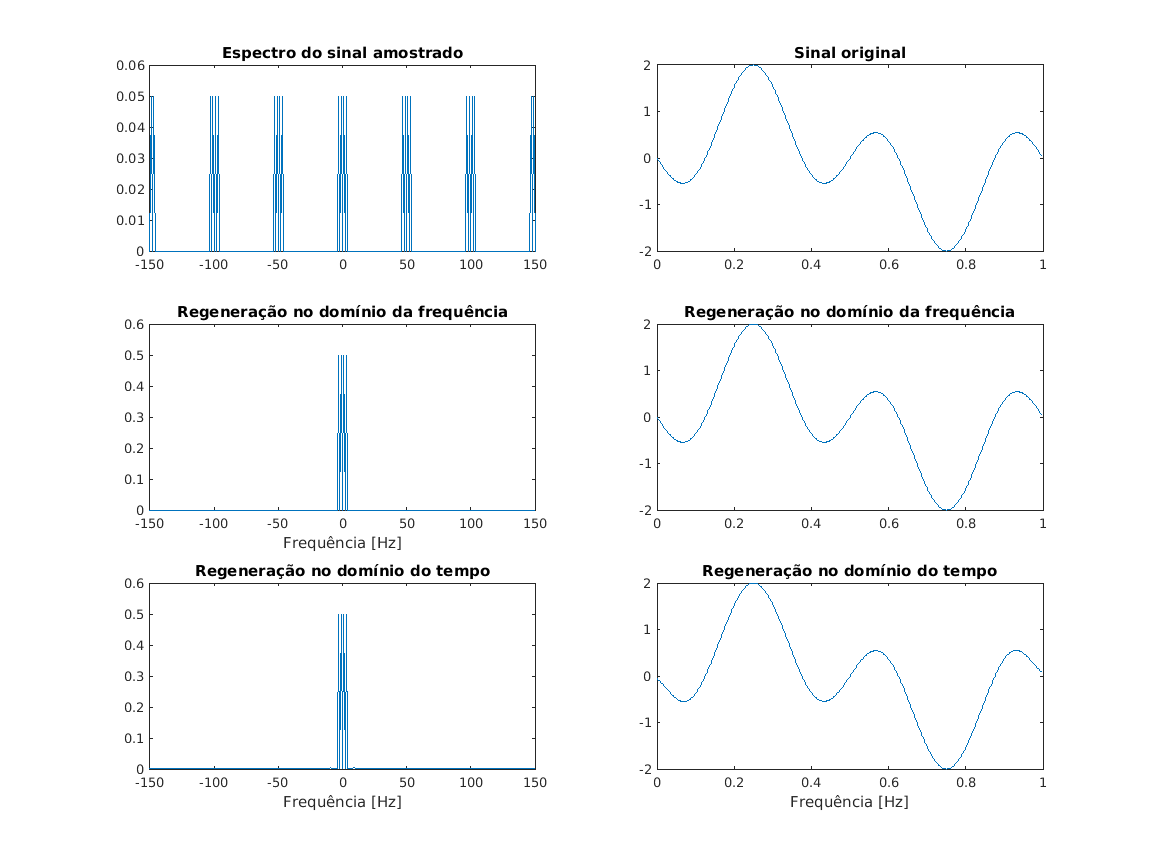

In [3]:
clc; clear all; close all;
% Para diminuir o tamanho do código desse experimento, coletaremos todos os dados Passo 1 da Prática 1
% e trabalharemos com o sinal gerado lá. Todas as variáveis terão o mesmo nome.
% O arquivo .mat deve sempre está na pasta em que o script está. Se necessário, rode o Passo 1 da Prática 1!!!
load('./Amostragem.mat');

%% Reconstrução realizando a filtragem no domínio da frequência
% Largura máxima de banda do filtro é dada por Bw = floor((lfft/N_samp)/2);
BW=10;                                                          % Largura de banda de 10
H_lpf=zeros(1,lfft);                                            % Zera vetor filtro
H_lpf(lfft/2-BW:lfft/2+BW-1)=1;                                 % Define 1 na frequência desejada (passa-banda)
S_recv=N_samp*S_out.*H_lpf;                                     % Filtragem ideal no domínio da frequência
s_recv=real(ifft(fftshift(S_recv)));                            % Reconstroi o sinal no tempo via ifft
s_recv=s_recv(1:lfft);                                          % Corrige numero de elementos 
s_recv=s_recv*(max(m_t)/max(s_recv));                           % Dá ganho pro sinal reconstruído

%%  Reconstrução realizando a filtragem no domínio do tempo por meio 
%   de uma interpolação explícita (usando a função sinc)
nSamples = length(s_out);                                       % Mede-se o comprimento do sinal
xSamples = 0 : nSamples-1;                                      % Vetor ordenado de amostras
trec = nSamples/Tf*[0:T:Tf];                                    % Eixo do tempo do sinal recuperado
Tsinc = 0.002;                                                  % Passo de tempo da sinc
Tfsinc = 50;                                                    % Tempo Final da sinc
tsinc = 0:Tsinc:Tfsinc;                                         % Eixo de tempo da sinc
s_recvSinc =0;                                                  % Cria o vetor da reconstrução
Bs = fm1;                                                       % Banda da transmissão (frequência do sinal original)
% Gera laço para somatório (interpolação explícita)
for ik = xSamples      
   Nx_sinc = s_out(ik+1)*sinc(2*pi*Bs*(tsinc-ik*T));            % Cria sinc para a amostra ik
   s_recvSinc = s_recvSinc+Nx_sinc;                             % Faz somatórios das sincs
end
s_recvSinc=s_recvSinc(1:lfft);                                  % Corrige comprimento do vetor
s_recvSinc=s_recvSinc*(max(m_t)/max(s_recvSinc));               % Ajusta o ganho
S_recvSinc=fftshift(fft(s_recvSinc,lfft)/lfft);                 % Espectro do sinal regenerado

%% Gráficos Reconstrução realizando a filtragem no domínio da frequência
% Plota espectro do sinal regenerado pelos dois métodos
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 12 9];
subplot(3,2,1);
plot(freq,abs(S_out));
title('Espectro do sinal amostrado');
axis([-150 150 0 .06]);
subplot(3,2,3);
plot(freq,abs(S_recv));
title('Regeneração no domínio da frequência');
xlabel('Frequência [Hz]');
axis([-150 150 0 .6]);
subplot(3,2,5);
plot(freq,abs(S_recvSinc));
title('Regeneração no domínio do tempo');
xlabel('Frequência [Hz]');
axis([-150 150 0 .6]);
% Plota sinal regenerado pelos dois métodos
subplot(3,2,2);
plot(t,m_t);
title('Sinal original');
subplot(3,2,4);
plot(t,s_recv(1:lfft));
title('Regeneração no domínio da frequência');
subplot(3,2,6);
plot(t,s_recvSinc(1:lfft));
title('Regeneração no domínio do tempo');
xlabel('Frequência [Hz]');

**Passo 04:** Abra um script no Python, salve-o como **handson6_3.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

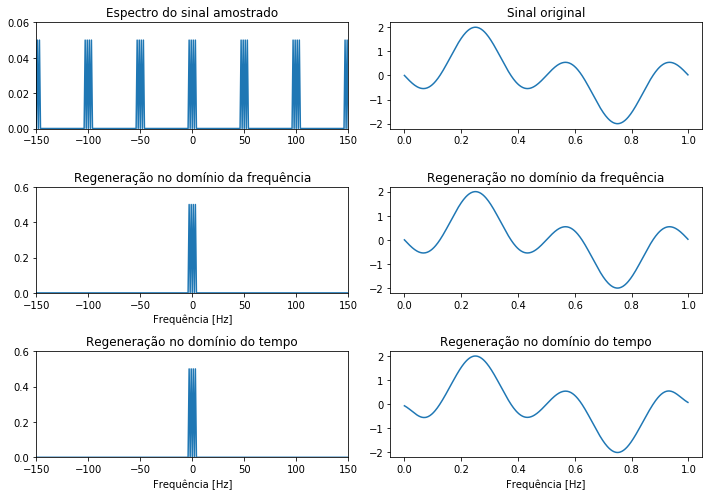

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft

# Para diminuir o tamanho do código desse experimento, coletaremos todos os dados Passo 1 da Prática 1
# e trabalharemos com o sinal gerado lá. Todas as variáveis terão o mesmo nome.
# O arquivo .mat deve sempre está na pasta em que o script está. Se necessário, rode o Passo 1 da Prática 1!!!
variaveis = loadmat('./Amostragem.mat')
T = float(variaveis['T'])
lfft = int(variaveis['lfft'])
N_samp = int(variaveis['N_samp'])
S_out = variaveis['S_out'].flatten()
s_out = variaveis['s_out'].flatten()
m_t = variaveis['m_t'].flatten()
t = variaveis['t'].flatten()
freq = variaveis['freq'].flatten()
Bs = fm1 = float(variaveis['fm1'])

# Reconstrução realizando a filtragem no domínio da frequência
BW=10                                                        # Largura de banda de 10
H_lpf=np.zeros(lfft)                                         # Zera vetor filtro
H_lpf[lfft//2-BW:lfft//2+BW-1]=1                             # Define 1 na frequência desejada
S_recv=N_samp*S_out*H_lpf                                    # Filtragem ideal
s_recv=np.real(ifft(fftshift(S_recv)))                       # Reconstroi o sinal no tempo
s_recv=s_recv*np.max(m_t)/np.max(s_recv)                     # Dá ganho pro sinal reconstruído

#  Reconstrução realizando a filtragem no domínio do tempo por meio 
#  de uma interpolação explícita (usando a função sinc)
# Gera laço para somatório
Tsinc = 0.002                                                # Passo de tempo da sinc
Tfsinc = 50                                                  # Tempo Final da sinc
tsinc = np.arange(0,Tfsinc,Tsinc)                            # Eixo de tempo da sinc
nSamples = len(s_out)                                        # Mede-se o comprimento do sinal
xSamples = np.arange(0,nSamples)                             # Vetor ordenado de amostras
s_recvSinc=0
for ik in xSamples:      
    Nx_sinc = s_out[ik]*np.sinc(2*np.pi*Bs*(tsinc-ik*T))     # Cria sinc para a amostra ik
    s_recvSinc = s_recvSinc+Nx_sinc                          # Faz somatórios das sincs
    
s_recvSinc=s_recvSinc[0:lfft]                                # Corrige comprimento do vetor
s_recvSinc=s_recvSinc*(np.max(m_t)/np.max(s_recvSinc))       # Ajusta o ganho
S_recvSinc = fftshift(fft(s_recv,lfft)/lfft)

# Gráficos Reconstrução realizando a filtragem no domínio da frequência
# Plota espectro do sinal regenerado pelos dois métodos
plt.figure(1,[10,7])
plt.subplot(321)
plt.title("Espectro do sinal amostrado")
plt.plot(freq,np.abs(S_out))
plt.xlim([-150,150])
plt.ylim([0,0.06])
#
plt.subplot(323);
plt.plot(freq,abs(S_recv))
plt.title("Regeneração no domínio da frequência")
plt.xlabel("Frequência [Hz]")
plt.xlim([-150,150])
plt.ylim([0,0.6])
#
plt.subplot(325)
plt.plot(freq,abs(S_recvSinc))
plt.title("Regeneração no domínio do tempo")
plt.xlabel("Frequência [Hz]")
plt.xlim([-150,150])
plt.ylim([0,0.6])
# Plota sinal regenerado pelos dois métodos
plt.subplot(322)
plt.plot(t,m_t)
plt.title("Sinal original")
#
plt.subplot(324);
plt.plot(t,s_recv[:lfft])
plt.title("Regeneração no domínio da frequência")
#
plt.subplot(326)
plt.plot(t,s_recvSinc[:lfft])
plt.title("Regeneração no domínio do tempo");
plt.xlabel("Frequência [Hz]");
plt.tight_layout()
plt.show()

### Comentários sobre o código

- Sinal amostrado é o mesmo do **Passo 1** da **Prática 1**. Ele é composto da subtração de dois sinais senoidais:
```python
fm1=3                                                   # Frequência senoide 1      
fm2=1                                                   # Frequência senoide 2
m_t=np.sin(2*np.pi*fm2*t)-np.sin(2*np.pi*fm1*t)         # Sinal mensagem m(t)
```

- Esse sinal, e outros parâmetros, foram armazenados no arquivo **Amostragem.mat** e são recuperados no começo do código. Note que, no Python, cada parâmetro deve ser lido de maneira especial, levando em consideração o seu tipo. Se isso não for feito não receberemos mensagem de erro, mas várias operações com as variáveis podem não ser realizadas da maneira correta.
```python
variaveis = loadmat('./Amostragem.mat')
T = float(variaveis['T'])
lfft = int(variaveis['lfft'])
N_samp = int(variaveis['N_samp'])
S_out = variaveis['S_out'].flatten()
s_out = variaveis['s_out'].flatten()
m_t = variaveis['m_t'].flatten()
t = variaveis['t'].flatten()
freq = variaveis['freq'].flatten()
Bs = fm1 = float(variaveis['fm1'])
```

- O processo de reconstrução por filtragem no domínio da frequência é realizado ao montar manualmente um filtro ideal e multiplicar pelo o espectro do sinal amostrado. Para obter o sinal no tempo, lançamos mão da transformada inversa de Fourier (função **ifft**):
```python
BW=10                                                        # Largura de banda de 10
H_lpf=np.zeros(lfft)                                         # Zera vetor filtro
H_lpf[lfft//2-BW:lfft//2+BW-1]=1                             # Define 1 na frequência desejada
S_recv=N_samp*S_out*H_lpf                                    # Filtragem ideal
s_recv=np.real(ifft(fftshift(S_recv)))                       # Reconstroi o sinal no tempo
s_recv=s_recv*np.max(m_t)/np.max(s_recv)                     # Dá ganho pro sinal reconstruído
```

- Similar a prática 1, o código também traz a regeneração do sinal realizando a filtragem no domínio do tempo por meio de uma interpolação explícita usando a função *sinc*. Usamos um laço FOR para essa operação:
```python
for ik in xSamples:      
    Nx_sinc = s_out[ik]*np.sinc(2*np.pi*Bs*(tsinc-ik*T))     # Cria sinc para a amostra ik
    s_recvSinc = s_recvSinc+Nx_sinc                          # Faz somatórios das sincs    
s_recvSinc=s_recvSinc[0:lfft]                                # Corrige comprimento do vetor
s_recvSinc=s_recvSinc*(np.max(m_t)/np.max(s_recvSinc))       # Ajusta o ganho
S_recvSinc = fftshift(fft(s_recv,lfft)/lfft)
```

- Os gráficos mostram os sinais no tempo e frequência para cada etapa do processo de regeneração. Note que, independente do método utilizado para filtrar o sinal amostrado, o sinal original é recuperado sem perdas.

# Prática 3: Quantização

Até o momento, com a amostragem, temos um sinal discreto no tempo, mas ainda analógico, pois sua amplitude pode assumir qualquer valor em $\mathbb{R}$. O processo de quantização tem o objetivo de discretizar o eixo de amplitude. Assim, por meio da amostragem e quantização, o sinal que era contínuo em tempo e amplitude (uma função com domínio e imagem pertencentes ao $\mathbb{R}$) passa a ser representado por uma função com domínio e imagem pertencentes ao $\mathbb{N}$.

A maneira clássica de realizar a quantização é estabelecer limites mínimo e máximo de amplitude ($-m_{p},m_{p}$) e  $L$ níveis uniformemente espaçados entre si, de forma que os níveis de quantização sejam separados de  $\Delta =\frac{2m_{p}}{L}$. A figura a seguir ilustra esse processo para uma onda senoidal e L$~$=$~$16.

![fig_quant](https://upload.wikimedia.org/wikipedia/commons/b/bf/Pcm.svg)

Note que depois de quantizada, essa onda senoidal pode ser reqpresentada por um vetor de tamanho finito (quantidade de amostras) e com elementos extraídos de um conjunto de números finitos (de 0 à 15). O sinal passa a ser:

$$ m = [ 8 \; 9 \; 11 \; 13\; 14\; 15\; 15\; 15\; 14\; 13\; 12\; 10\; 8\; 7\; 5\; 3\; 2\; 1\; 0\; 0\; 0\; 1\; 2\; 4\; 6\; 7]$$

Outra característica é a perda de informação inerente ao processo de arredondamento dos valores de amplitude. Essa é uma perda irreversível, a qual precisamos controlar para que a onda quantizada não distorça o sinal a ponto de sua recuperação ser de baixa qualidade. Esse erro de arredondamento de amplitude é chamado de erro de quantização $\varepsilon$ e pode ser escrito como:

$$ - \frac{\Delta}{2} \leq \varepsilon \leq \frac{\Delta}{2} $$

ou

$$ - \frac{m_{p}}{L} \leq \varepsilon \leq \frac{m_{p}}{L} $$

No experimento a seguir, um sinal $m(t)$ é quantizado usando a função **round**, o qual retorna o número inteiro mais próximo do número real passado como parâmetro. Os gráficos do sinal original, do sinal quantizado e do erro de quantização são mostrados. Os valores de $-m_{p}$ e $m_{p}$ serão configurados com os valores mínimos e máximos do sinal de entrada, respectivamente.

**Passo 01:** Abra um script no Matlab, salve-o como **handson6_4.m** e escreva o seguinte código:

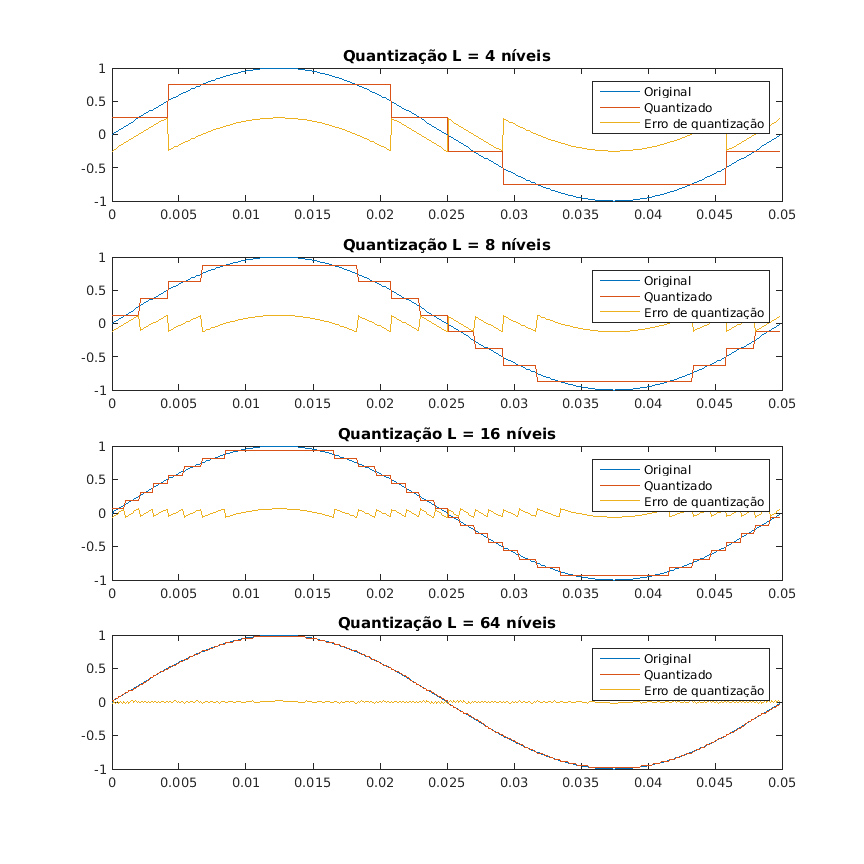

In [1]:
clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
m_t=sin(2*pi*20*t);                                 % Sinal m(t)
L= [ 4 8 16 64 ];                                   % Vetor com níveis de quantização

sig_max=max(m_t);                                   % Encontra pico máximo
sig_min=min(m_t);                                   % Encontra pico mínimo
%% Quantização com round() para cada nível de quantização especificado
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];
for il = 1:length(L)
    Li = L(il);
    Delta=(sig_max-sig_min)/Li;                     % Intervalo de quantização (separação entre um nível e outro)
    q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;  % Vetor com amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)
    sigp=m_t-sig_min;                               % Deixa o sinal somente com amplitudes positivas (shift para cima)
    sigp = sigp/Delta;
    sigp = floor(sigp);
    % Agora que nenhum valor do sinal agora é zero nem negativo: isso é importante para que o vetor comece de 1
    qindex=round(sigp)+1;                             % Encontra inteiro mais proximo para cada elemento
    %É somado 1 ao vetor q index pois o índice 0 não é válido no MATLAB
    qindex=min(qindex,Li);                          % Trunca o excedente de qindex
    q_out=q_level(qindex);                          % Calcula a amplitude quantizada de cada amostra
    % Gráficos
    subplot(length(L),1,il)
    plot (t,m_t,t,q_out,t,(m_t-q_out));
    legend('Original', 'Quantizado','Erro de quantização');
    title(['Quantização L = ' num2str(Li) ' níveis']);
end

**Passo 02:** Abra um script no Python, salve-o como **handson6_4.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

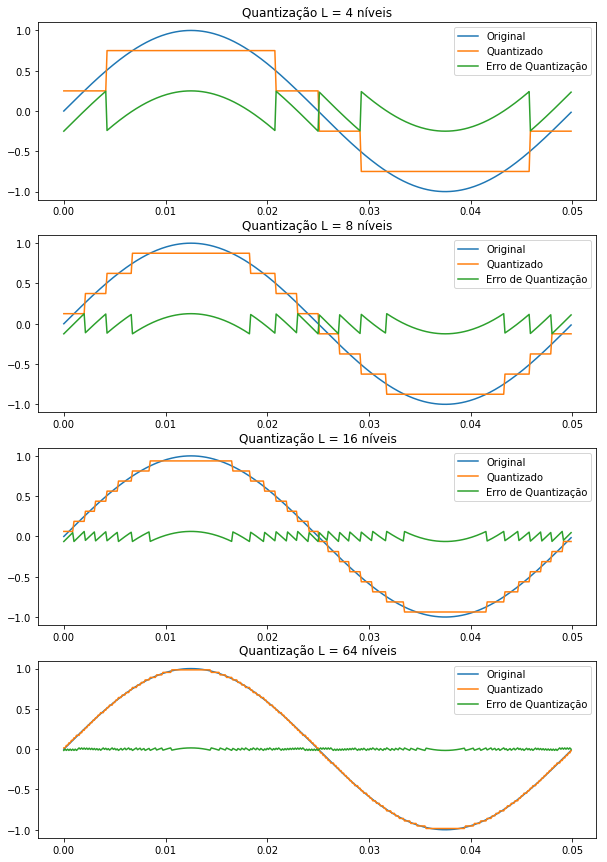

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fs=8000                                              # Frequência de amostragem
Ts=1/fs                                              # Período de amostragem
fm=20                                                # Frequência da onda
Tm=1/fm                                              # Período de amostragem
t= np.arange(0,Tm,Ts)                                # Eixo do tempo
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 64 ];                                 # Níveis de quantização
sig_max=max(m_t)                                     # Encontra pico máximo
sig_min=min(m_t)                                     # Encontra pico mínimo
plt.figure(1,[10,15])
# Quantização com round() para cada nível de quantização especificado
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                       # Intervalo de quantização (distância entre um nível e outro)
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) # Vetor com as amplitudes dos Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

    sigp=m_t-sig_min                                 # Deixa o sinal somente com amplitudes positivas (shift para cima)
    # Calcula a quantidade de nívels (não inteiro ainda) de cada amostra (elementos >= 0)
    sigp //= Delta                                

    qindex = sigp.astype(int)     #Forçamos o tipo do array como int para usar seus valores como índices
    qindex[qindex >= Li] = Li-1   #Trunca o excedente de qindex
    q_out = q_level[qindex] #Distribui os níveis de cada elemento
    
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,m_t,t,q_out,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis'.format(Li))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
    
plt.show()

### Comentários sobre o código

- Sinal amostrado a ser quantizado é um seno com frequência de 20 Hz. Os níveis de quantização podem ser especificados e nesse experimento fazemos para 4, 8, 16 e 64 níveis. A quantidade de gráficos se ajusta ao tamanho do vetor (ou  lista) L:
```python
m_t=np.sin(2*np.pi*fm*t)                             # Sinal m(t)
L= [ 4, 8, 16, 64 ];                                 # Níveis de quantização
```

- O sinal tem valores positivos e negativos de amplitude. No experimento acima, a primeira etapa da quantização foi dar um shift de amplitude no sinal, criando um vetor com somente valores positivos de amplitude. O operador "//=" em Python representa uma Floor Division, ou seja, os níveis de amplidute foram divididos pelo valor de $\Delta$ para sabermos quantos níveis cada valor de amplitude carrega e arredondamos o valor obtido para baixo. Depois, utilizamos a função ".astype(int)" para forçar que o array contenha valores do tipo int e seja possível usar seus valores como índices. Assim, obtemos um vetor com a quantidade de $\Delta$s que cada nível do sinal representa. Se aplicarmos esse vetor como índices do vetor com os valores de amplitude de cada nível, teremos o sinal quantizado.
```python
for il in range(0,len(L)):
    Li = L[il]
    Delta=(sig_max-sig_min)/Li                   
    q_level=np.arange(sig_min+Delta/2,sig_max,Delta) 
    sigp=m_t-sig_min                                 
    sigp //= Delta                                
    qindex = sigp.astype(int)     
    qindex[qindex >= Li] = Li-1   
    q_out = q_level[qindex]       
```

- Cada iteração do laço _FOR_ gera um gráfico com título identificado pelo nível de quantização que gerou o sinal. O sinal original, o sinal quantizado e o erro de quantização são mostrados no gráfico para cada nível de quantização configurado.
```python
for il in range(0,len(L)):
    ...
    ## Plotting
    plt.subplot('{}1{}'.format(len(L),il+1))
    plt.plot(t,q_out,t,m_t,t,(m_t-q_out))
    plt.title('Quantização L = {} níveis'.format(Li))
    plt.legend(["Original", "Quantizado", "Erro de Quantização"])
```


Por meio desse experimento, podemos ver claramente que o nível de quantizaçao influencia diretamente na qualidade do sinal quantizado. Quanto maior for o número de níveis, melhor será a aproximação feita, ou seja menor o **erro de quantização**. Outra medida utilizada para quantizar a qualidade do sinal quantizado é a SQNR (Relação Sinal-Ruído de Quantização). A SQNR é definida como a razão entre a potência do sinal não quantizado $m(t)$ e a potência do erro de quantização. Sendo $\hat{m}(t)$ o sinal quantizado, podemos escrever:

$$ SQNR = \frac{P_S}{P_E} \Rightarrow SQNR_{dB} = 20 log_{10}\left( \frac{\left |m(t)  \right|}{\left |m(t) - \hat{m}(t)  \right|}\right)$$


**Para o relatório**: implemente a SQNR para os sinais quantizados neste experimento. Seu código deve incluir o valor da SQNR no título de cada gráfico! Responda e evidencie no seu experimento: quantos níveis são necessários para atingir uma SQNR de aproximadamente 48.5 dB? Faça o código em Matlab e em Python.

**Para o relatório**: implemente um código em Python que abra o sinal da **Prática 1** e faça sua quantização usando 8, 32, 128 níveis. Faça o processo de reconstrução ideal do sinal (qualquer método) usando o sinal quantizado. Calcule a SQNR de cada caso e evidencie como é a qualidade da reconstrução do sinal (tempo e frequência) para cada nível de quantização especificado.

# Prática 4: Codificação

Como explicado anteriormente, a etapa de codificação é responsável por representar o sinal, agora discreto no tempo e amplitude, em uma sequência de bits. No Matlab, as funções **de2bin** (Decimal-to-Binary) e **bi2de** (Binary-to-Decimal) formam um par que permite codificar e decodificar uma sequência de números inteiros.

Existem conceitos clássicos relacionados a conversão de decimal para binário, entres eles:
- MSB (Most Significant Bit ou bit mais significativo): É o bit representa o maior valor na forma de representar uma palavra binária;
- LSB  (Least Significant Bit ou bit mais significativo): É o bit representa o menor valor na forma de representar uma palavra binária;
- Right-MSB (MSB mais a direta): Equivale ao Left-LSB, é quando o bit mais significativo está mais a direita (é o primeiro);
- Left-MSB (MSB mais a direta):  Equivale ao Right-LSB, é quando o bit mais significativo está mais a esquerda (é o último).

Por exemplo, o número 20 é 00101 na representação Right-MSB e é 10100 na representação Left-MSB:
- 00101 em Right-MSB significa = $\textbf{0} \cdot 2^0+\textbf{0} \cdot 2^1+ \textbf{1} \cdot2^2+ \textbf{0} \cdot 2^3+ \textbf{1} \cdot 2^4$ = 4 + 16 = 20;
- 00101 em Left-MSB significa = $\textbf{0} \cdot 2^4+\textbf{0} \cdot 2^3+ \textbf{1} \cdot2^2+ \textbf{0} \cdot 2^1+ \textbf{1} \cdot 2^0$ = 4 + 1 = 5;
- 10100 em Left-MSB significa = $\textbf{1} \cdot 2^4+\textbf{0} \cdot 2^3+ \textbf{1} \cdot2^2+ \textbf{0} \cdot 2^1+ \textbf{0} \cdot 2^0$ = 16 + 4 = 20.

Vamos ver esses números no Matlab:

In [2]:
binWord = de2bi(20)
DecWord = bi2de(binWord)


binWord =

     0     0     1     0     1


DecWord =

    20



Alternativamente, podemos usar o parâmetro 'left-msb' e obter a representação Left-MSB:

In [4]:
binWord = de2bi(20,'left-msb')
DecWord = bi2de(binWord)
DecWordlsb = bi2de(binWord,'left-msb')


binWord =

     1     0     1     0     0


DecWord =

     5


DecWordlsb =

    20



Isto é, precisamos ter cuidado em especificar qual o padrão de ordenação de bits, pois uma mesma palavra binária pode significar valores numéricos diferentes, dependendo se for Left- ou Right-MSB.

O principal parâmetro associado a codificação é o número de bits por amostra $n$. Ele está intimamente atrelado a quantização, pois ao definirmos o valor de $n$, estamos definido automaticamente o valor de $L$, pois

$$L = 2^n \Leftrightarrow n = log_2(L),$$

sendo $L$ o número de níveis de amplitude da quantização e $n$ o número de bits que representa cada nível quantizado.

Agora, depois de amostragem, quantização e codificação, temos uma taxa $R$ em bits por segundo (bps) associada ao sinal, de tal forma que:

$$R = f_s \; [{\rm amostras \; por \; segundo}] \cdot n \; [{\rm bit \; por \;amostras}] = 2W\cdot n \;  {\rm bps}$$

sendo $f_s = 2W$ a taxa de Nyquist.

Como isso, temos uma relação bem clara entre os parâmetros dos processos de digitalização e os parâmetros do sinal de entrada, bem como a taxa resultante. Isso se reflete, por exemplo, nos requisitos necessário para armazenamento e/ou transmissão de arquivos digitalizados. Por exemplo, qual o tamanho em Bytes necessário para armazenar 5 minutos de um áudio PCM com qualidade de CD?

- Qualidade de CD (sem compressão) significa: amostragem de 44,1 KHz e quantização de 16 bits, resultando em $R = 44,1 \cdot 16 = 705,6$ kbps;
- Para uma música de 5 minutos: Tamanho = $ R \cdot 5\cdot 60 = 705 \cdot 5\cdot 60 = 211680$ kbits;
- Tamanho em Bytes: Tamanho = $\frac{211680}{8} = 26460$ kB = 26,46 MB;


**Passo 01:** Abra um script no Matlab, salve-o como **handson6_5.m** e escreva o seguinte código:

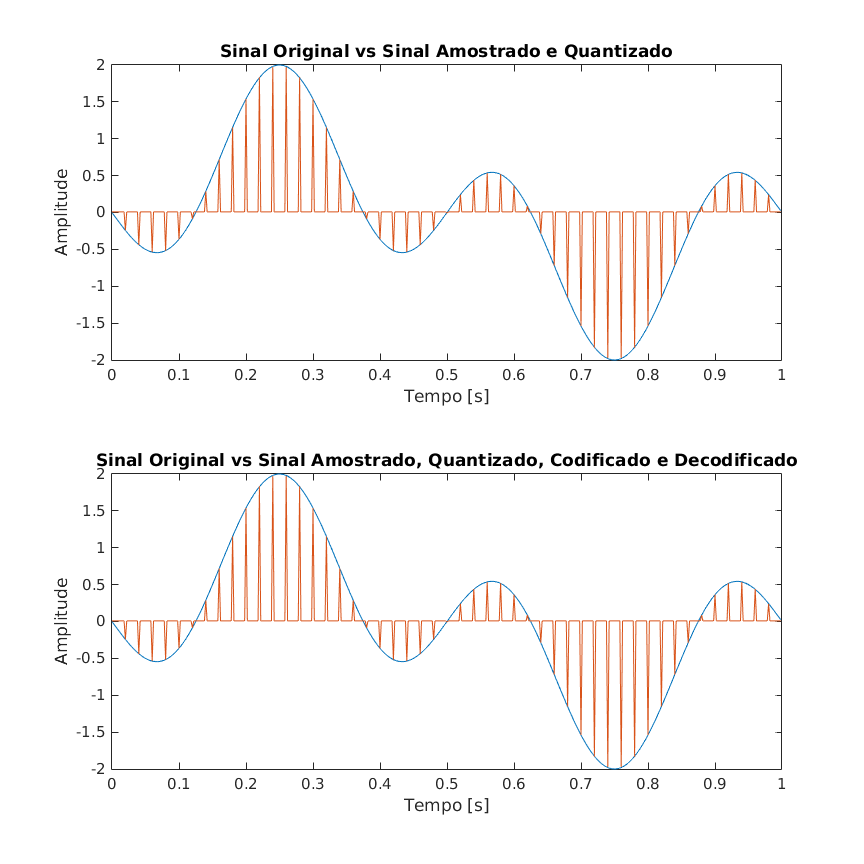

In [1]:
close all; clear all; clc;
%% Parâmetros
T=0.002;                                                % Taxa de amostragem (500kHz)
Tf=1;                                                   % Tempo final em segundos
t=0:T:Tf-T;                                             % Definição do eixo do tempo      
fm1=3;                                                  % Frequência senoide 1      
fm2=1;                                                  % Frequência senoide 2
m_t=sin(2*pi*fm2*t)-sin(2*pi*fm1*t);                    % Sinal mensagem m(t)
ts=0.02;                                                % Nova taxa de amostragem
N_samp=round(ts/T);                                     % Número de elementos
n = 8;                                                  % Número de bits por nível
L= 2^n;                                                 % Níveis de quantização
%
%% Amostragem 
s_out=downsample(m_t,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out=upsample(s_out,N_samp);                           % Retorna vetor amostrado com o numero inicial de elementos
%
%% Quantização
sig_max=max(s_out);                                     % Encontra pico máximo
sig_min=min(s_out);                                     % Encontra pico mínimo
Delta=(sig_max-sig_min)/L;                              % Intervalo de quantização (separação entre um nível e outro)
q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;          % Vetor com amplitudes dos Q níveis 
sigp=s_out-sig_min;                                     % Shift para cima
sigp=sigp*(1/Delta);                                    % Calcula a quantidade de nívels
sigp=sigp+1/2;                                          % Tira elementos do zero 
qindex=round(sigp);                                     % Encontra inteiro mais proximo para cada elemento
qindex=min(qindex,L);                                   % Remove o excedente de qindex 
q_out=q_level(qindex);                                  % Calcula a amplitude quantizada de cada amostra
%
%% Codificador binário
vet_bin = de2bi(qindex-1);                              % Codificando sinal 
%
%% Decodificador de binário
vet_dec_rec = bi2de(vet_bin);                           % Transforma sinal para decimal novamente
revert = q_level(vet_dec_rec+1);                        % Recupera os níveis quantizados
%
% Gráficos
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 9 9];
subplot(2,1,1)
plot(t,m_t,t,q_out)
title('Sinal Original vs Sinal Amostrado e Quantizado');
xlabel('Tempo [s]');
ylabel('Amplitude');
%
subplot(2,1,2)
plot(t,m_t,t,revert)
title('Sinal Original vs Sinal Amostrado, Quantizado, Codificado e Decodificado');
xlabel('Tempo [s]');
ylabel('Amplitude');

Existe funções similares no Python para codificar e decodificar em binário. No Matlab, as funções utilizadas foram **de2bin** (Decimal-to-Binary) e **bi2de** (Binary-to-Decimal), já em Python será utilizada a função **numpy.binary_repr()**, que retorna a sequência de bits no padrão Left-MSB e em forma de string ('str'). Para a decodificação, um simples _casting_ para inteiro resolve o problema. Vejamos:

In [5]:
import numpy as np
binWord = np.binary_repr(20) #decimal para binário
print(binWord)
print(type(binWord))

decWord = int(binWord,2) #binário para decimal
print(decWord)
print(type(decWord))

10100
<class 'str'>
20
<class 'int'>


**Passo 02:** Abra um script no Python, salve-o como **handson6_5.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

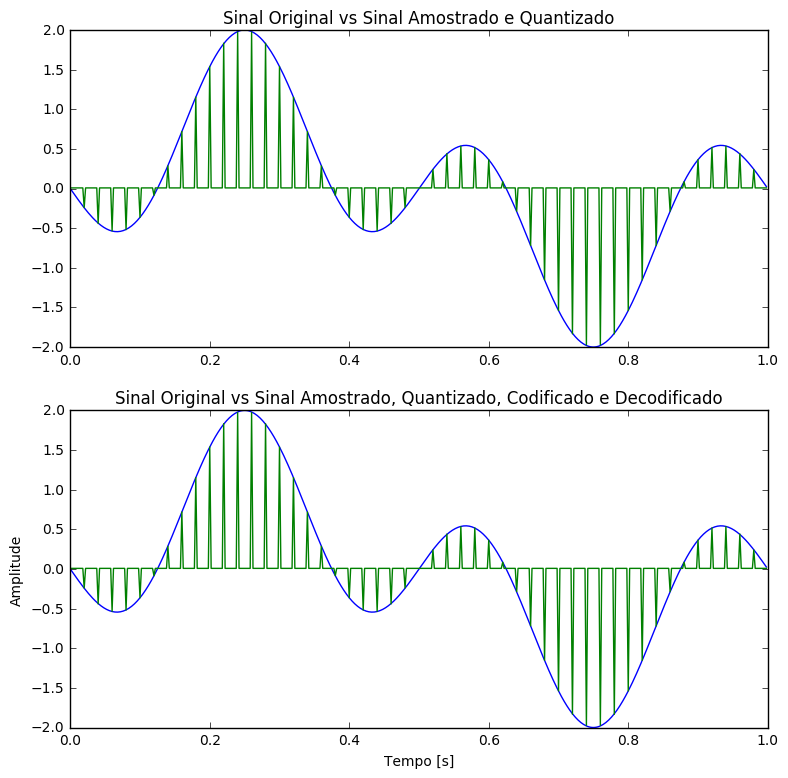

In [1]:
# Parâmetros
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
#
# Criação das funções, por questão de organização
def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret
#
# Geração do sinal
T=0.002                                             # Taxa de amostragem (500kHz)
Tf=1                                                # Tempo final em segundos
t= np.arange(0,Tf,T)                                # Definição do eixo do tempo      
fm1=3                                               # Frequência senoide 1      
fm2=1                                               # Frequência senoide 2
m_t=np.sin(2*np.pi*fm2*t)-np.sin(2*np.pi*fm1*t)     # Sinal mensagem m(t)
ts=0.02                                             # Nova taxa de amostragem
N_samp=round(ts/T)                                  # Número de elementos 
#
# Amostragem 
s_out=downsample(m_t,N_samp)                        # Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out=upsample(s_out,N_samp)                        # Retorna vetor amostrado com o número inicial de elementos
#
# Quantização
sig_max=max(s_out)                                  # Encontra pico máximo
sig_min=min(s_out) 
n = 8;                                              # Número de bits por nível
L= 2**n;                                            # Níveis de quantização
Delta=(sig_max-sig_min)/L                           # Intervalo de quantização (distância entre um nível e outro)
q_level=np.arange(sig_min+Delta/2,sig_max,Delta)    # Vetor com as amplitudes dos Q níveis 
sigp=s_out-sig_min                                  # Deixa o sinal somente com amplitudes positivas (shift para cima)
sigp=sigp*(1/Delta)                                
sigp=sigp + 1/2 +0.001                              # Tira elementos do zero 
qindex=np.round(sigp)                               # Encontra inteiro mais proximo para cada elemento
qindex[qindex>L] = L                                # Trunca o excedente de qindex 
qindex = qindex.astype(int)                         # Casting para inteiro (garantindo que é do tipo inteiro)
q_out=q_level[abs(qindex-1)]                        # Distribui nos níveis cada elemento   
#   
# Codificação
# A função map recebe dois parâmetros: uma função e um iterável, e aplica essa função a cada elemento do iterável
vet_bin  = map(np.binary_repr,qindex-1)             # Transforma para binário
# O retorno da função map é um 'map object', que é um iterável. Queremos trabalhar com um array da numpy e, para isso,
# precisamos fazer uma conversão, via função np.fromiter() "from iterable":
vet_bin = np.fromiter(vet_bin,dtype=np.int)
#
# Decodificação
# É simplesmente converter os elementos de vet_bin de inteiros: para evitar sintaxes e conversões complicadas, 
# vamos usar um laço para recuperar o vetor:
vet_dec_rec = np.ndarray(len(vet_bin),dtype = np.int)# Vetor vazio com o mesmo tamanho de vet_bin, tipo inteiro
for i in range(len(vet_dec_rec)):
    vet_dec_rec[i] = int(str(vet_bin[i]),2) 
# Lembrando que, para converter de binário para decimal com o "casting" int(numero,base), a variável 'numero'
# precisa ser uma string ('str')
revert=q_level[abs(vet_dec_rec)]
#
# Gráficos
plt.figure(1,[9,9])
plt.subplot(211)
plt.plot(t,m_t,t,q_out)
plt.title("Sinal Original vs Sinal Amostrado e Quantizado")
#plt.legend(["Sinal recuperado","Sinal quantizado"])
#
plt.subplot(212)
plt.plot(t,m_t,t,revert)
plt.title("Sinal Original vs Sinal Amostrado, Quantizado, Codificado e Decodificado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

plt.show()

### Comentários sobre o código

- Sinal amostrado é o mesmo do **Passo 1** da **Prática 1**. Ele é composto da subtração de dois sinais senoidais. Decidimos reconstruir o sinal ao invés de abri-lo do arquivo:
```python
fm1=3                                                   # Frequência senoide 1      
fm2=1                                                   # Frequência senoide 2
m_t=np.sin(2*np.pi*fm2*t)-np.sin(2*np.pi*fm1*t)         # Sinal mensagem m(t)
```

- A amostragem é feita com retorno a zero (como fizemos anteriormente):
```python
s_out=downsample(m_t,N_samp)                        
s_out=upsample(s_out,N_samp)                        
```

- O processo de quantização e codificação são feitos obedecendo uma quantidade de bits especificada, gerando dois vetores importantes: (i) **qindex**: Vetor de números inteiros indicando o nível quantizado de cada amostra do sinal; e (ii)  **q_out**: Vetor com o valor de amplitude de cada amostra do sinal depois do processo de quantização. Comparando Matlab com Python, devemos ter um cuidado especial com a sintaxe das duas linguangens. Um exemplo bem claro de confusão entre sintaxes é a operação de elevar um número a uma potência. É usual usarmos ```x^y``` para essa operação (e.g. em Matlab, em LaTex), mas em Python ela é realizada como ```x**y```. Ao usarmos  ```x^y``` em Python não reberemos nenhum warning, pois ela corresponde a operação XOR. Isso pode ser fonte de bug!!!
```python
sig_max=max(s_out)                                  # Encontra pico máximo
sig_min=min(s_out) 
n = 8;                                              # Número de bits por nível
L= 2**n;                                            # Níveis de quantização
Delta=(sig_max-sig_min)/L                           
q_level=np.arange(sig_min+Delta/2,sig_max,Delta)    # Vetor com as amplitudes dos Q níveis 
sigp=s_out-sig_min                                  
sigp=sigp*(1/Delta)                                
sigp=sigp + 1/2 +0.001                              # Tira elementos do zero 
qindex=np.round(sigp)                               # Encontra inteiro mais proximo para cada elemento
qindex[qindex>L] = L                                # Trunca o excedente de qindex 
qindex = qindex.astype(int)                         
q_out=q_level[abs(qindex-1)]                        # Distribui nos níveis cada elemento 
```

- A codificação foi feita diretamente no vetor dos níveis quantizados do sinal (vetor **qindex**). A função **map** foi utilizada para realizar a operação no vetor de dados, sem a necessidade de laço. Contudo, o retorno da função **map** é um **map object**, que é um iterável. Como queremos trabalhar com um **array** da numpy precisamos fazer uma conversão. Isso é feito via função **np.fromiter()**:
```python
vet_bin  = map(np.binary_repr,qindex-1)             # Transforma para binário
vet_bin = np.fromiter(vet_bin,dtype=np.int)
```

- Já a decodifcação foi feita por meio de casting, mas usando laço. Lembrando que, para converter de binário para decimal com o casting **int(numero,base)**, a variável _numero_ precisa ser uma string ('str'). Por isso, temos que dá o casting para str internamente. 
```python
vet_dec_rec = np.ndarray(len(vet_bin),dtype = np.int)
for i in range(len(vet_dec_rec)):
    vet_dec_rec[i] = int(str(vet_bin[i]),2) 
revert=q_level[abs(vet_dec_rec)]
```

- Os gráficos mostram o sinal original, o sinal quantizado e o sinal decodficado no domínio do tempo. Veja que não notamos perda visual no processo de quantização/codificação com o número de bits igual a 8.

# Prática 5: Multiplexação e demultiplexação (TDM)

Vários sinais ao serem combinados de maneira adequada podem ser transmitidos usando a mesma largura de banda. Para tal, lançamos mão da multiplexação por divisão de tempo (_Time Division Multiplexing_ - TDM). Se tratando de uma onda PAM (amostrada, quantizada e representada por pulsos com amplitude variável) a multiplexação permite a transmissão simultânea de sinais, de modo que os pulsos são entrelaçados no domínio do tempo. A figura a seguir ilustra a mutliplexação de 4 sinais PAM (sinais A, B, C e D), com diferentes amplitudes e formatos. Note a formação de quadros de tramsmissão (_frames_), período em que amostras coletadas de cada onda multiplexada são transmitidas.

![](./FIGS/HD_06/TDM_PAM_Multiplex.jpg)

Já de posse do sinal digital depois da codificação, há basicamente duas formas de multiplexar dois ou mais sinais no tempo:
1. **Entrelaçamento de bits**: Alterna-se sequencialmente (transmite-se) os bits de cada sinal a ser multiplexado; 
2. **Entrelaçamento de palavras**: Alterna-se sequencialmente (transmite-se) um grupo de _N_ bits (palavra) de cada sinal multiplexado.

A figura a seguir ilustra os dois tipos de multiplexação, mostrando a formação do quadro de transmissão (período de tempo que o multiplexador dá uma volta completa e coleta dados de todos os sinais a serem transmitidos). Os blocos de transmissão podem ser bits (caso seja entrelaçamento de bits) ou blocos de bits (no caso do entrelaçamento de palavras).
![](./FIGS/HD_06/TDM_Multiplex_codificacao.jpg)


Nesse experimento faremos a multiplexação de dois sinais codificados em binário, simulando transmissão e recepção sem perdas.

**Passo 01:** Abra um script no Matlab, salve-o como **handson6_6.m** e escreva o seguinte código. Verifique que algumas operações estão duplicadas, com uma implementação via laço FOR e também via operação matricial. O código mostra a porcentagem de ganho no tempo de execução ao se usar operação matricial ao invés de laço.

In [2]:
clc; clear all;close all;
%% Parâmetros dos sinais
t=0:0.01:10;
f1=0.5;
f2=0.2;
% Neste experimento os sinais devem ter a mesma amplitude, pois a
% quantização é feita sem ajuste da amplitude (por simplicidade)
A = 10;                                                
sinal01=A*cos(2*pi*f1*t);
sinal02=A*cos(2*pi*f2*t);

%% Codificador de sinais
% Ajustando sinal 01
sig_quan01= sinal01-min(sinal01)+1;                     % Todos elementos positivos
sig_quan01= round(sig_quan01);                          % Transforma sinal em números inteiros
sig_code01= de2bi(sig_quan01);                          % Transforma em sinal binário
[x,n] = size(sig_code01);                               % n é o número de bits do codificador
% Ajustando sinal 02
sig_quan02= sinal02-min(sinal02)+1;                     % Todos elementos positivos
sig_quan02= round(sig_quan02);                          % Transforma sinal em números inteiros
sig_code02= de2bi (sig_quan02);                         % Transforma em sinal binário

%% Multiplexador de sinais por entrelaçamento de palavras N bits (N = bits do codificador)
frameSize = 4;        % Tamanho do quadro (número máximo de sinais a serem multiplexados)                               
tMat = tic;
mux_sig_mat = zeros(frameSize*length(t),n);
vtIndexS1 = 1:frameSize:length(t)*(frameSize);  % Indices de posição do sinal 1 no vetor multiplexado 
vtIndexS2 = 2:frameSize:length(t)*(frameSize);  % Indices de posição do sinal 2 no vetor multiplexado (preenchido com zeros) 
vtIndexS3 = 3:frameSize:length(t)*(frameSize);  % Indices de posição do sinal 3 no vetor multiplexado
vtIndexS4 = 4:frameSize:length(t)*(frameSize);  % Indices de posição do sinal 4 no vetor multiplexado (preenchido com zeros)
mux_sig_mat(vtIndexS1,:) = sig_code01;
mux_sig_mat(vtIndexS3,:) = sig_code02;
dtMat = toc(tMat);
disp(['Tempo de execução da implementação matricial = ' num2str(dtMat)]);
tFor = tic;
mux_sig = zeros(frameSize*length(t),n);
vtZero = zeros(1,n);
for i=1:1:length(sig_code01)
    mux_sig(4*(i-1)+1,:)    =   sig_code01(i,:);
    mux_sig(4*(i-1)+2,:)    =   vtZero;
    mux_sig(4*(i-1)+3,:)    =   sig_code02(i,:);
    mux_sig(4*(i-1)+4,:)    =   vtZero;
end
dtFor = toc(tFor);
disp(['Tempo de execução da implementação com laço = ' num2str(dtFor)]);
disp(['Ganho da implementação matricial = ' num2str(100*(dtFor-dtMat)/dtFor) ' %']);
if ( isequal(mux_sig,mux_sig_mat) == 1)
    disp('Matrizes mux_sig e mux_sig_mat iguais');
else
    disp('Matrizes mux_sig e mux_sig_mat diferentes');
end
%% Demultiplexação 
% Com laço for
demux_01 = [];
demux_02 = [];
for i=1:length(sig_code01)
    demux_01(i,:)= mux_sig((i-1)*4 + 1,:);
    demux_02(i,:)= mux_sig((i-1)*4 + 3,:);
end
% Matricial
demux_01_mat = mux_sig_mat(vtIndexS1,:); 
demux_02_mat = mux_sig_mat(vtIndexS3,:);
if ( isequal(demux_01_mat,demux_01) == 1)
    disp('Matrizes demux_01_mat e demux_01 iguais');
else
    disp('Matrizes demux_01_mat e demux_01 diferentes');
end
if ( isequal(demux_02_mat,demux_02) == 1)
    disp('Matrizes demux_02_mat e demux_02 iguais');
else
    disp('Matrizes demux_02_mat e demux_02 diferentes');
end
% Decodificação
sig_rec01 = bi2de(demux_01);
sig_rec02 = bi2de(demux_02);
% Teste de decodifcação
if ( isequal(sig_quan01,sig_rec01.') == 1)
    disp('Sinais sig_quan01 e sig_rec01 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais sig_quan01 e sig_rec01 diferentes: decodificação falhou!');
end

if ( isequal(sig_quan02,sig_rec02.') == 1)
    disp('Sinais sig_quan01 e sig_rec01 iguais: decodificação realizada com sucesso!');
else
    disp('Sinais sig_quan01 e sig_rec01 diferentes: decodificação falhou!');
end

Tempo de execução da implementação matricial = 0.000264
Tempo de execução da implementação com laço = 0.019887
Ganho da implementação matricial = 98.6725 %
Matrizes mux_sig e mux_sig_mat iguais
Matrizes demux_01_mat e demux_01 iguais
Matrizes demux_02_mat e demux_02 iguais
Sinais sig_quan01 e sig_rec01 iguais: decodificação realizada com sucesso!
Sinais sig_quan01 e sig_rec01 iguais: decodificação realizada com sucesso!


Montar um Mux como este parece complicado, mas pode ser melhor entendido quando cada iteração do laço for é processada separadamente. Cada iteração se destina a montar 4 linhas da matriz _mux sig_. Na primeira iteração, as linhas 1 e 3 são preenchidas com os sinais 1 e 2, respectivamente, enquanto que as linhas 2 e 4 são prenchidas com zeros. Dessa forma, ilustramos um multiplexador de 4 sinais, mas para simplificar só transmitimos 2 (os demais preenchemos com zeros). Assim, cada iteração pula 4 linhas e preenche as próximas 4. Isso é implementado por ```mux sig(4*(i-1)+1,:)```. Ilustrando o que aconteceria em três loops, escrevemos:

```python
# Loop 1
mux_sig(1,:)    =   sig_code01(1,:);
mux_sig(2,:)    =   Zeros; 
mux_sig(3,:)    =   sig_code02(1,:);
mux_sig(4,:)    =   Zeros;
# Loop 2
mux_sig(5,:)    =   sig_code01(2,:);
mux_sig(6,:)    =   Zeros; 
mux_sig(7,:)    =   sig_code02(2,:);
mux_sig(8,:)    =   Zeros;
# Loop 2
mux_sig(9,:)    =   sig_code01(3,:);
mux_sig(10,:)   =   Zeros; 
mux_sig(11,:)   =   sig_code02(3,:);
mux_sig(12,:)   =   Zeros;
```

Note que a matriz é preenchida de 4 em 4 linhas a cada iteração do loop.

Já na implementação matricial, criamos um vetor de índices para cada sinal e montamos a matriz diretamente por meio do vetor de índices. Os vetores de índices são:
> vtIndexS1 = [1 5 9 13 ...]

> vtIndexS2 = [2 6 10 14 ...]

> vtIndexS3 = [3 7 11 15 ...]

> vtIndexS4 = [4 8 12 16 ...]

A montagem da matriz é feita como:
```python
mux_sig_mat(vtIndexS1,:) = sig_code01;
mux_sig_mat(vtIndexS3,:) = sig_code02;
```

Ao usar o **vtIndexS1** como indexador das posições do sinal 1 nas linhas da matriz **mux_sig_mat**, estamos forçando que cada linha da matriz **sig_code01** esteja na posições indicadas por **vtIndexS1** na matriz **mux_sig_mat**.

A demutiplexação segue no mesmo princípio.

**Passo 02:** Abra um script no Python, salve-o como **handson6_6.py** e escreva o seguinte código (se for executar o código, não esqueça de mudar o Kernel do Jupyter para Python):

In [1]:
import numpy as np

# Como visto anteriormente, para economizar linhas de código, uma boa prática é resumir a conversão 
# binário/decimal em duas funções:
def de2bi(sinal):
    from numpy import fromiter,binary_repr,round 
    sinal_bin = round(sinal).astype(int)
    return fromiter(map(binary_repr,sinal_bin),dtype=int)
#
def bi2de(sinal):
    from numpy import ndarray
    sinal_dec = ndarray(len(sinal),dtype=int)
    for i in range(len(sinal_dec)):
        sinal_dec[i] = int(str(sinal[i]),2)  
    return sinal_dec
#
## Parâmetros dos sinais
t = np.arange(0,10,0.01)
f1=0.5
f2=0.2
A = 10
sinal01=A*np.cos(2*np.pi*f1*t)
sinal02=A*np.cos(2*np.pi*f2*t)
#
# Quantização e codificação
# Sinal 1
sig_quan01= sinal01-np.min(sinal01)+1      # Todos elementos positivos
sig_quan01= np.round(sig_quan01)           # Transforma sinal em números inteiros
sig_code01= de2bi(sig_quan01)              # Transforma em sinal binário 
# Sinal 2
sig_quan02= sinal02-np.min(sinal02)+1      # Todos elementos positivos
sig_quan02= np.round(sig_quan02)           # Transforma sinal em números inteiros
sig_code02= de2bi(sig_quan02)              # Transforma em sinal binário 
# Multiplexação
frameSize = 4;                            # Tamanho do quadro (número máximo de sinais a serem multiplexados)      
mux_sig = np.zeros(len(sig_code01)*frameSize,dtype=int)
#mux_sig é uma matriz 4000x5 em matlab, onde cada coluna contém os 5 dígitos do binário
#em Python, a palavra binária não é decomposta nos seus 5 dígitos
#devido a isso, mux_sig é um simples array de 4000 elementos, cada um sendo um binário completo
for i in range(1,len(sig_code01)+1): 
    mux_sig[4*(i-1)]      =   sig_code01[i-1]  # Indexação em python começa em 0
    mux_sig[4*(i-1)+1]    =   0
    mux_sig[4*(i-1)+2]    =   sig_code02[i-1]
    mux_sig[4*(i-1)+3]    =   0
#
#Demultiplexador de sinais    
demux_01 = np.zeros(1000,dtype=int)
demux_02 = np.zeros(1000,dtype=int)
for i in range(1,1001):
    demux_01[i-1]= mux_sig[(i-1)*4 ]
    demux_02[i-1]= mux_sig[(i-1)*4 + 2]
# Decodifcação    
sig_rec01 = bi2de(demux_01)
sig_rec02 = bi2de(demux_02)
# Teste se decoficação funcionou
if (np.array_equal(sig_rec01,sig_quan01)):
   print("Sinais sig_rec01 e sig_quan01 são iguais: decodficação realizada com sucesso!!!")
else:
   print("Sinais sig_rec01 e sig_quan01 são diferentes: decodficação falhou!!!")
if (np.array_equal(sig_rec02,sig_quan02)):
   print("Sinais sig_rec02 e sig_quan02 são iguais: decodficação realizada com sucesso!!!")
else:
   print("Sinais sig_rec02 e sig_quan02 são diferentes: decodficação falhou!!!")

Sinais sig_rec01 e sig_quan01 são iguais: decodficação realizada com sucesso!!!
Sinais sig_rec02 e sig_quan02 são iguais: decodficação realizada com sucesso!!!


**Para relatório:**

Desejamos montar uma estação central para o monitoramento simultâneo do eletrocardiograma de 5 pacientes hospitalizados, como ilustra a figura a seguir. Os dados dos 5 pacientes são levados ao centro de processamento, são amostrados, quantizados, codificados para binário e multiplexados por divisão no tempo. Os dados multiplexados são, então, transmitidos à estação de monitoramento em PCM via cabo. 

![fig_eletrocardio](../FIGS/HD_06/TDM_eletrocardio.png)

Os 5 sinais a serem multiplexados são disponibilizados [nesse link](https://github.com/vicentesousa/DCO2004_2022/blob/master/MATERIAL/HD_06/Pacientes.mat). Nesse arquivo também está disponível a taxa de amostragem que os sinais foram gerados. Monte seu sistema com as seguintes especficações:

- **Amostragem/reconstrução:** Construa um sinal amostrado retornando a zero usando downsampling e upsampling com N = 10. A maior frequência dos sinais a serem multiplexados é de 50 Hz;
- **Quantização e Codificação:** Quantize e codifique os sinais com 8 bits;
- **Multiplexador:** Por entrelaçamento de palavras de 8 bits.

Faça seu código e mostre os gráficos dos 5 sinais originais e depois da reconstrução no receptor. Use Python ou Matlab.

# Bibliografia

John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013.

HAYKIN, S.; MOHER, M. Sistemas de comunicação. 5. ed. Porto Alegre: Bookman, 2011. 512 p.

C. Richard Johnson Jr, William A. Sethares, Andrew G. Klein, Software Receiver Design 1st Edition, Cambridge University Press; 1 edition (August 18, 2011).

Lathi,B. P., Sistemas de Comunicações Analógicos e Digitais Modernos - 4ª Ed, LTC, 2012.


Varsha Mathuranathan, Digital Modulations using Matlab: Build Simulation Models (http://www.gaussianwaves.com).

Behrouz Forouzan, Data Communications and Networking (McGraw-Hill Forouzan Networking), 4th Edition, February 9, 2006.

